In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
train= pd.read_csv("covidLive.csv")

In [3]:
train.head(3)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [4]:
train.head(10)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
5,6,S. Korea,"24,769,101","28,406",42.0,"24,013,461","727,234",352,"482,547",553,"15,804,065","307,892","51,329,899"
6,7,UK,"23,621,952","189,919",NaN,"23,347,871","84,162",146,"344,857","2,773","522,526,476","7,628,357","68,497,907"
7,8,Italy,"22,432,803","177,054",NaN,"21,779,604","476,145",141,"372,250","2,938","246,636,495","4,092,684","60,262,770"
8,9,Japan,"21,229,216","44,678",NaN,"20,380,089","804,449",204,"169,043",356,"76,201,407","606,772","125,584,838"
9,10,Russia,"20,948,470","387,163",NaN,"19,979,763","581,544","2,300","143,674","2,655","273,400,000","1,875,095","145,805,947"


In [5]:
train.shape

(230, 13)

In [7]:
train.describe()

,#,New\nDeaths
count,230.000000,3.0
mean,115.500000,18.0
std,66.539462,21.0
min,1.000000,3.0
25%,58.250000,6.0
50%,115.500000,9.0
75%,172.750000,25.5
max,230.000000,42.0


In [9]:
def kesson_table(df): 
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return kesson_table_ren_columns
kesson_table(train)


,欠損数,%
#,0,0.000000
"Country,\nOther",0,0.000000
Total\nCases,0,0.000000
Total\nDeaths,5,2.173913
New\nDeaths,227,98.695652
Total\nRecovered,16,6.956522
Active\nCases,15,6.521739
"Serious,\nCritical",83,36.086957
Tot Cases/\n1M pop,2,0.869565
Deaths/\n1M pop,7,3.043478


In [10]:
train

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"


In [11]:
print(train)

       # Country,\nOther Total\nCases Total\nDeaths  New\nDeaths  \
0      1             USA   98,166,904     1,084,282          NaN   
1      2           India   44,587,307       528,629          NaN   
2      3          France   35,342,950       155,078          NaN   
3      4          Brazil   34,706,757       686,027          NaN   
4      5         Germany   33,312,373       149,948          NaN   
..   ...             ...          ...           ...          ...   
225  226            Niue           80           NaN          NaN   
226  227    Vatican City           29           NaN          NaN   
227  228          Tuvalu           20           NaN          NaN   
228  229  Western Sahara           10             1          NaN   
229  230      MS Zaandam            9             2          NaN   

    Total\nRecovered Active\nCases Serious,\nCritical Tot Cases/\n1M pop  \
0         94,962,112     2,120,510              2,970            293,206   
1         44,019,095        39,

In [12]:
train.head(3)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [13]:
print(train['New\nDeaths]'')

SyntaxError: EOL while scanning string literal (<ipython-input-13-123c588fac38>, line 1)

In [14]:
combine1 = [train]

In [15]:
for train in combine1:
    print(train)

       # Country,\nOther Total\nCases Total\nDeaths  New\nDeaths  \
0      1             USA   98,166,904     1,084,282          NaN   
1      2           India   44,587,307       528,629          NaN   
2      3          France   35,342,950       155,078          NaN   
3      4          Brazil   34,706,757       686,027          NaN   
4      5         Germany   33,312,373       149,948          NaN   
..   ...             ...          ...           ...          ...   
225  226            Niue           80           NaN          NaN   
226  227    Vatican City           29           NaN          NaN   
227  228          Tuvalu           20           NaN          NaN   
228  229  Western Sahara           10             1          NaN   
229  230      MS Zaandam            9             2          NaN   

    Total\nRecovered Active\nCases Serious,\nCritical Tot Cases/\n1M pop  \
0         94,962,112     2,120,510              2,970            293,206   
1         44,019,095        39,

In [16]:
print(train['TotalDeaths'])

KeyError: 'TotalDeaths'

In [17]:
print("Total\nDeaths")

Total
Deaths


In [18]:
print(train["Total\nDeaths"])

0      1,084,282
1        528,629
2        155,078
3        686,027
4        149,948
         ...    
225          NaN
226          NaN
227          NaN
228            1
229            2
Name: Total\nDeaths, Length: 230, dtype: object


In [19]:
train.head{3}

SyntaxError: invalid syntax (<ipython-input-19-ac567f49cc49>, line 1)

In [20]:
train.head(3)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [21]:
print(train.isnull(),sum())

TypeError: sum() takes at least 1 positional argument (0 given)

In [22]:
print(train.isnull().sum())

#                       0
Country,\nOther         0
Total\nCases            0
Total\nDeaths           5
New\nDeaths           227
Total\nRecovered       16
Active\nCases          15
Serious,\nCritical     83
Tot Cases/\n1M pop      2
Deaths/\n1M pop         7
Total\nTests           16
Tests/\n1M pop         16
Population              2
dtype: int64


In [29]:
train["TotalDeaths"].fillna(train.TotalDeaths.mean(), inplace=True)

KeyError: 'TotalDeaths'

In [30]:
train= pd.read_csv("covidLive.csv")

In [31]:
train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [35]:
for el in train["TotalDeaths"]:
    print(el)

1,084,282
528,629
155,078
686,027
149,948
28,406
189,919
177,054
44,678
387,163
101,139
114,084
43,148
14,984
129,897
22,643
144,421
330,065
158,093
11,003
141,794
117,539
25,024
109,206
20,738
33,111
36,369
74
32,767
11,698
61,141
32,659
44,992
216,539
41,059
14,183
102,185
62,916
67,016
7,065
20,194
25,355
17,000
47,503
29,362
1,617
20,455
16,900
2,959
10,153
14,122
7,905
30,616
4,098
13,690
5,981
16,278
37,714
9,320
16,902
10,674
6,820
29,249
19,789
8,530
22,234
8,913
2,345
35,894
12,018
7,118
8,497
7,485
2,179
5,990
9,910
9,351
19,583
1,520
16,761
2,563
4,384
19,458
5,403
2,681
11,844
1,180
5,814
24,613
6,437
7,572
893
10,993
682
8,683
16,136
4,260
9,534
5,678
4,017
3,588
2,789
1,123
2,781
6,879
3,155
5,602
5,226
1,637
2,221
225
1,044
758
2,991
213
4,229
7,799
989
308
4,195
3,628
4,065
1,459
3,317
3,056
1,466
1,935
806
1,917
559
410
1,442
202
1,968
2,682
826
1,385
649
314
1,422
1,281
683
878
1,410
4,961
995
410
21
3,163
38
306
169
155
282
668
227
1,024
187
845
285
116
449
833
28
70

In [36]:
for i, el in enumerate(train["TotalDeaths"]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229


In [39]:
for i, el in enumerate(train["TotalDeaths"]):
    if el == NaN:
        train["TotalDeaths"] = int(el)

NameError: name 'NaN' is not defined

In [40]:
for i, el in enumerate(train["TotalDeaths"]):
    if el == nan:
        train["TotalDeaths"] = int(el)

NameError: name 'nan' is not defined

In [50]:
from math import isnan
for i, el in enumerate(train["TotalDeaths"]):
    el = el.replace(",","")
    if isnan(int(el)):
        train["TotalDeaths"] = int(el)

1,084,282
528,629
155,078
686,027
149,948
28,406
189,919
177,054
44,678
387,163
101,139
114,084
43,148
14,984
129,897
22,643
144,421
330,065
158,093
11,003
141,794
117,539
25,024
109,206
20,738
33,111
36,369
74
32,767
11,698
61,141
32,659
44,992
216,539
41,059
14,183
102,185
62,916
67,016
7,065
20,194
25,355
17,000
47,503
29,362
1,617
20,455
16,900
2,959
10,153
14,122
7,905
30,616
4,098
13,690
5,981
16,278
37,714
9,320
16,902
10,674
6,820
29,249
19,789
8,530
22,234
8,913
2,345
35,894
12,018
7,118
8,497
7,485
2,179
5,990
9,910
9,351
19,583
1,520
16,761
2,563
4,384
19,458
5,403
2,681
11,844
1,180
5,814
24,613
6,437
7,572
893
10,993
682
8,683
16,136
4,260
9,534
5,678
4,017
3,588
2,789
1,123
2,781
6,879
3,155
5,602
5,226
1,637
2,221
225
1,044
758
2,991
213
4,229
7,799
989
308
4,195
3,628
4,065
1,459
3,317
3,056
1,466
1,935
806
1,917
559
410
1,442
202
1,968
2,682
826
1,385
649
314
1,422
1,281
683
878
1,410
4,961
995
410
21
3,163
38
306
169
155
282
668
227
1,024
187
845
285
116
449
833
28
70

AttributeError: 'float' object has no attribute 'replace'

In [51]:
train["TotalDeaths"].fillna(train.TotalDeaths.mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [54]:
from math import isnan
train= pd.read_csv("covidLive.csv")


In [55]:
for i, el in enumerate(train["TotalDeaths"]):
    el = el.replace(",","")
    train["TotalDeaths"] = int(el)

AttributeError: 'float' object has no attribute 'replace'

In [56]:
for i, el in enumerate(train["TotalDeaths"]):
    if type(el) == str:
        el = el.replace(",","")
    train["TotalDeaths"] = int(el)

In [57]:
train["TotalDeaths"].fillna(train.TotalDeaths.mean(), inplace=True)

In [58]:
print(train.isnull().sum())

#                         0
Country                   0
Total\r\nCases            0
TotalDeaths               0
New\r\nDeaths           227
Total\r\nRecovered       16
Active\r\nCases          15
Serious,\r\nCritical     83
Tot Cases/\r\n1M pop      2
Deaths/\r\n1M pop         7
Total\r\nTests           16
Tests/\r\n1M pop         16
Population                2
dtype: int64


In [59]:
train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904",1,NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307",1,NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950",1,NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [63]:
train= pd.read_csv("covidLive.csv")
train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [64]:
train.iat[3, 0] = 42

In [65]:
train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [66]:
print(train.iat[3, 0])

42


In [67]:
train.iat[1, 0]

2

In [69]:
train.iat[1, 3]

'528,629'

In [71]:
for i, el in enumerate(train["TotalDeaths"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,3] = int(el)

In [72]:
train["TotalDeaths"].fillna(trainz.TotalDeaths.mean(), inplace=True)

In [73]:
train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307",528629.0,NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950",155078.0,NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [74]:
train["TotalDeaths"].fillna(train.TotalDeaths.mean(), inplace=True)

In [75]:
print(train.isnull().sum())

#                         0
Country                   0
Total\r\nCases            0
TotalDeaths               0
New\r\nDeaths           227
Total\r\nRecovered       16
Active\r\nCases          15
Serious,\r\nCritical     83
Tot Cases/\r\n1M pop      2
Deaths/\r\n1M pop         7
Total\r\nTests           16
Tests/\r\n1M pop         16
Population                2
dtype: int64


In [77]:
for i, el in enumerate(train["New\r\nDeaths"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,3] = int(el)

In [79]:
train["New\r\nDeaths"].fillna(train["New\r\nDeaths"].mean(), inplace=True)

In [80]:
train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,18.0,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307",528629.0,18.0,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950",155078.0,18.0,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [81]:
print(train.isnull().sum())

#                        0
Country                  0
Total\r\nCases           0
TotalDeaths              0
New\r\nDeaths            0
Total\r\nRecovered      16
Active\r\nCases         15
Serious,\r\nCritical    83
Tot Cases/\r\n1M pop     2
Deaths/\r\n1M pop        7
Total\r\nTests          16
Tests/\r\n1M pop        16
Population               2
dtype: int64


In [98]:
train= pd.read_csv("covidLive.csv")
for i, el in enumerate(train["Total\r\nRecovered"]):
    if type(el) == str:
        el = el.replace(",","")
        train.iat[i,5] = float(el)
        
train["Total\r\nRecovered"].fillna(train.TotalDeaths.mean(), inplace=True)

for i, el in enumerate(train["New\r\nDeaths"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,4] = int(el)
    
train["New\r\nDeaths"].fillna(trainz.TotalDeaths.mean(), inplace=True)

for i, el in enumerate(train["TotalDeaths"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,3] = int(el)
    
train["TotalDeaths"].fillna(trainz.TotalDeaths.mean(), inplace=True)

train.head(3)

TypeError: can only concatenate str (not "int") to str

In [105]:
train= pd.read_csv("covidLive.csv")
for i, el in enumerate(train["Total\r\nRecovered"]):
    if type(el) == str:
        el = el.replace(",","")
        train.iat[i,5] = int(el)
        
train.head(4)
#train["Total\r\nRecovered"].fillna(train.TotalDeaths.mean(), inplace=True)

# for i, el in enumerate(train["New\r\nDeaths"]):
    
#     if type(el) != str:
#         continue
#     el = el.replace(",","")
#     train.iat[i,4] = int(el)
    
# train["New\r\nDeaths"].fillna(trainz.TotalDeaths.mean(), inplace=True)

# for i, el in enumerate(train["TotalDeaths"]):
    
#     if type(el) != str:
#         continue
#     el = el.replace(",","")
#     train.iat[i,3] = int(el)
    
# train["TotalDeaths"].fillna(trainz.TotalDeaths.mean(), inplace=True)

train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [106]:
print(train.isnull().sum())

#                         0
Country                   0
Total\r\nCases            0
TotalDeaths               5
New\r\nDeaths           227
Total\r\nRecovered       16
Active\r\nCases          15
Serious,\r\nCritical     83
Tot Cases/\r\n1M pop      2
Deaths/\r\n1M pop         7
Total\r\nTests           16
Tests/\r\n1M pop         16
Population                2
dtype: int64


In [112]:
train= pd.read_csv("covidLive.csv")

for i, el in enumerate(train["TotalDeaths"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,3] = int(el)
    
train["TotalDeaths"].fillna(train["TotalDeaths"].mean(), inplace=True)

for i, el in enumerate(train["Total\r\nRecovered"]):
    if type(el) == str:
        el = el.replace(",","")
        train.iat[i,5] = int(el)
        
train.head(4)
train["Total\r\nRecovered"].fillna(train["Total\r\nRecovered"].mean(), inplace=True)

for i, el in enumerate(train["New\r\nDeaths"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,4] = int(el)
    
train["New\r\nDeaths"].fillna(train["New\r\nDeaths"].mean(), inplace=True)



train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,18.0,94962112.0,"2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307",528629.0,18.0,44019095.0,"39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950",155078.0,18.0,34527115.0,"660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"


In [113]:
print(train.isnull().sum())

#                        0
Country                  0
Total\r\nCases           0
TotalDeaths              0
New\r\nDeaths            0
Total\r\nRecovered       0
Active\r\nCases         15
Serious,\r\nCritical    83
Tot Cases/\r\n1M pop     2
Deaths/\r\n1M pop        7
Total\r\nTests          16
Tests/\r\n1M pop        16
Population               2
dtype: int64


In [115]:
for i, el in enumerate(train["Active\r\nCases"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,6] = int(el)
    
train["Active\r\nCases"].fillna(train["Active\r\nCases"].mean(), inplace=True)

for i, el in enumerate(train["Serious,\r\nCritical"]):
    if type(el) == str:
        el = el.replace(",","")
        train.iat[i,7] = int(el)
train["Serious,\r\nCritical"].fillna(train["Serious,\r\nCritical"].mean(), inplace=True)

for i, el in enumerate(train["Tot Cases/\r\n1M pop"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,8] = int(el)
    
train["Tot Cases/\r\n1M pop"].fillna(train["Tot Cases/\r\n1M pop"].mean(), inplace=True)

for i, el in enumerate(train["Deaths/\r\n1M pop"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,9] = int(el)
    
train["Deaths/\r\n1M pop"].fillna(train["Deaths/\r\n1M pop"].mean(), inplace=True)


for i, el in enumerate(train["Total\r\nTests"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,10] = int(el)
    
train["Total\r\nTests"].fillna(train["Total\r\nTests"].mean(), inplace=True)

for i, el in enumerate(train["Tests/\r\n1M pop"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,11] = int(el)
    
train["Tests/\r\n1M pop"].fillna(train["Tests/\r\n1M pop"].mean(), inplace=True)

for i, el in enumerate(train["Population"]):
    
    if type(el) != str:
        continue
    el = el.replace(",","")
    train.iat[i,12] = int(el)
    
train["Population"].fillna(train["Population"].mean(), inplace=True)

train.head(3)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,18.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,"44,587,307",528629.0,18.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,"35,342,950",155078.0,18.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07


10         Turkey
11          Spain
12        Vietnam
13      Australia
14      Argentina
15    Netherlands
16           Iran
17         Mexico
18      Indonesia
19         Taiwan
Name: Country, dtype: object


<BarContainer object of 10 artists>

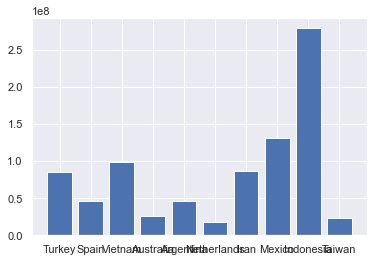

In [145]:
import matplotlib.pyplot as plt
import numpy as np

left = np.arange(10)
height = train["Population"][10:20]
labels = train["Country"][10:20]
print(labels)
width = 0.1

plt.bar(left, height, tick_label=labels)

In [146]:
train.head(5)

,#,Country,Total\r\nCases,TotalDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904",1084282.0,18.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08
1,2,India,"44,587,307",528629.0,18.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09
2,3,France,"35,342,950",155078.0,18.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07
3,4,Brazil,"34,706,757",686027.0,18.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08
4,5,Germany,"33,312,373",149948.0,18.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07


0         USA
1       India
2      France
3      Brazil
4     Germany
5    S. Korea
6          UK
7       Italy
8       Japan
9      Russia
Name: Country, dtype: object


<BarContainer object of 10 artists>

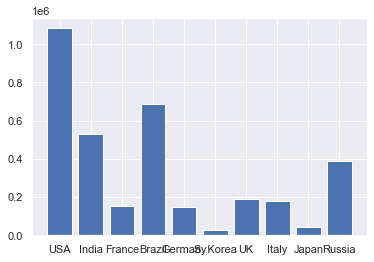

In [148]:
import matplotlib.pyplot as plt
import numpy as np

left = np.arange(10)
height = train["TotalDeaths"][:10]
labels = train["Country"][:10]
print(labels)
width = 0.1

plt.bar(left, height, tick_label=labels)